<a href="https://colab.research.google.com/github/yingzibu/ODE/blob/main/paper/iScience_neuralODE_for_PK_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paper: Neural-ODE for pharmacokinetics modeling and its advantage to alternative machine learning models in predicting new dosing regimens

https://www.cell.com/iscience/fulltext/S2589-0042(21)00772-0?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS2589004221007720%3Fshowall%3Dtrue

Original Code:

https://github.com/jameslu01/Neural_PK/tree/v1.0.0


In [1]:
!git clone https://github.com/jameslu01/Neural_PK.git --quiet

In [2]:
! pip install torchdiffeq --quiet
# ! pip install latex --quiet

In [3]:
ls

Neural_PK/  sample_data/


In [4]:
cd Neural_PK/5fold_models/Neural-ODE

/content/Neural_PK/5fold_models/Neural-ODE


In [5]:
ls

args.py        data_split.py  model.py         run_predict.py  run_train.py
data_parse.py  evaluation.py  process_data.py  run.sh          utils.py


In [6]:
! python process_data.py

In [7]:
ls

args.py   data_parse.py  evaluation.py  process_data.py  run.sh        utils.py
data.csv  data_split.py  model.py       run_predict.py   run_train.py


In [8]:
! python data_split.py --data data.csv --fold 1 --model 1

/content/Neural_PK/5fold_models/Neural-ODE/data_split.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PTNM"] = df["PTNM"] + 0.1
/content/Neural_PK/5fold_models/Neural-ODE/data_split.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  augment_data = pd.concat([augment_data, df], ignore_index=True)
/content/Neural_PK/5fold_models/Neural-ODE/data_split.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [38]:
!CUDA_VISIBLE_DEVICES="" python run_train.py --fold 1 --model 1 --save fold_1 --lr 5e-4 --tol 1e-4 --epochs 30 --l2 0.1

/content/Neural_PK/5fold_models/Neural-ODE/run_train.py
run_train.py --fold 1 --model 1 --save fold_1 --lr 5e-4 --tol 1e-4 --epochs 30 --l2 0.1
100% 672/672 [03:57<00:00,  2.83it/s]
tensor([ 2.5941,  4.2938, 10.3170,  5.5254, 11.8489,  9.1352,  6.7426, 13.1780,
        11.1472], grad_fn=<IndexBackward0>)
tensor([ 5.8156,  0.8816, 16.1310,  0.8871, 19.8420,  3.7824,  0.8870, 20.1590,
         5.8156])

        Epoch 0001 | Training loss 19.344110 | Training R2 0.026574 | Validation loss 17.147366 | Validation R2 0.120062
        Best loss 17.147366 | Best epoch 0001
        
100% 672/672 [03:59<00:00,  2.80it/s]
tensor([ 5.8851, 29.4401, 25.7064, 22.5288], grad_fn=<IndexBackward0>)
tensor([ 0.4385, 64.0190, 10.8380,  2.4664])

        Epoch 0002 | Training loss 18.646738 | Training R2 0.095495 | Validation loss 26.121798 | Validation R2 -1.042036
        Best loss 17.147366 | Best epoch 0001
        
100% 672/672 [04:00<00:00,  2.79it/s]
tensor([ 5.7908, 26.7971, 22.8372, 18.8772], grad

In [39]:
!CUDA_VISIBLE_DEVICES="" python run_predict.py --fold 1 --model 1 --save fold_1 --tol 1e-4

/content/Neural_PK/5fold_models/Neural-ODE/utils.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpt = torch.load(ckpt_path)


In [40]:
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize'] = (3.5, 3)

result_path = '/content/Neural_PK/5fold_models/Neural-ODE/fold_1/fold_1_model_1.csv'
df_here = pd.read_csv(result_path)
df_here

,PTNM,TIME,labels,preds
0,9,0.0,4.836500,6.092882
1,9,24.0,59.638000,59.151794
2,9,192.0,22.474001,17.013868
3,9,504.0,4.489500,5.786371
4,9,552.0,52.431999,51.035603
...,...,...,...,...
1061,196,5352.0,7.408800,8.578214
1062,196,5544.0,2.021400,3.812072
1063,196,5568.0,57.067001,52.616108
1064,196,5736.0,17.261000,16.532833


In [41]:
import numpy as np
import matplotlib.pyplot as plt
unique_ids = df_here['PTNM'].unique()
len(unique_ids)

40

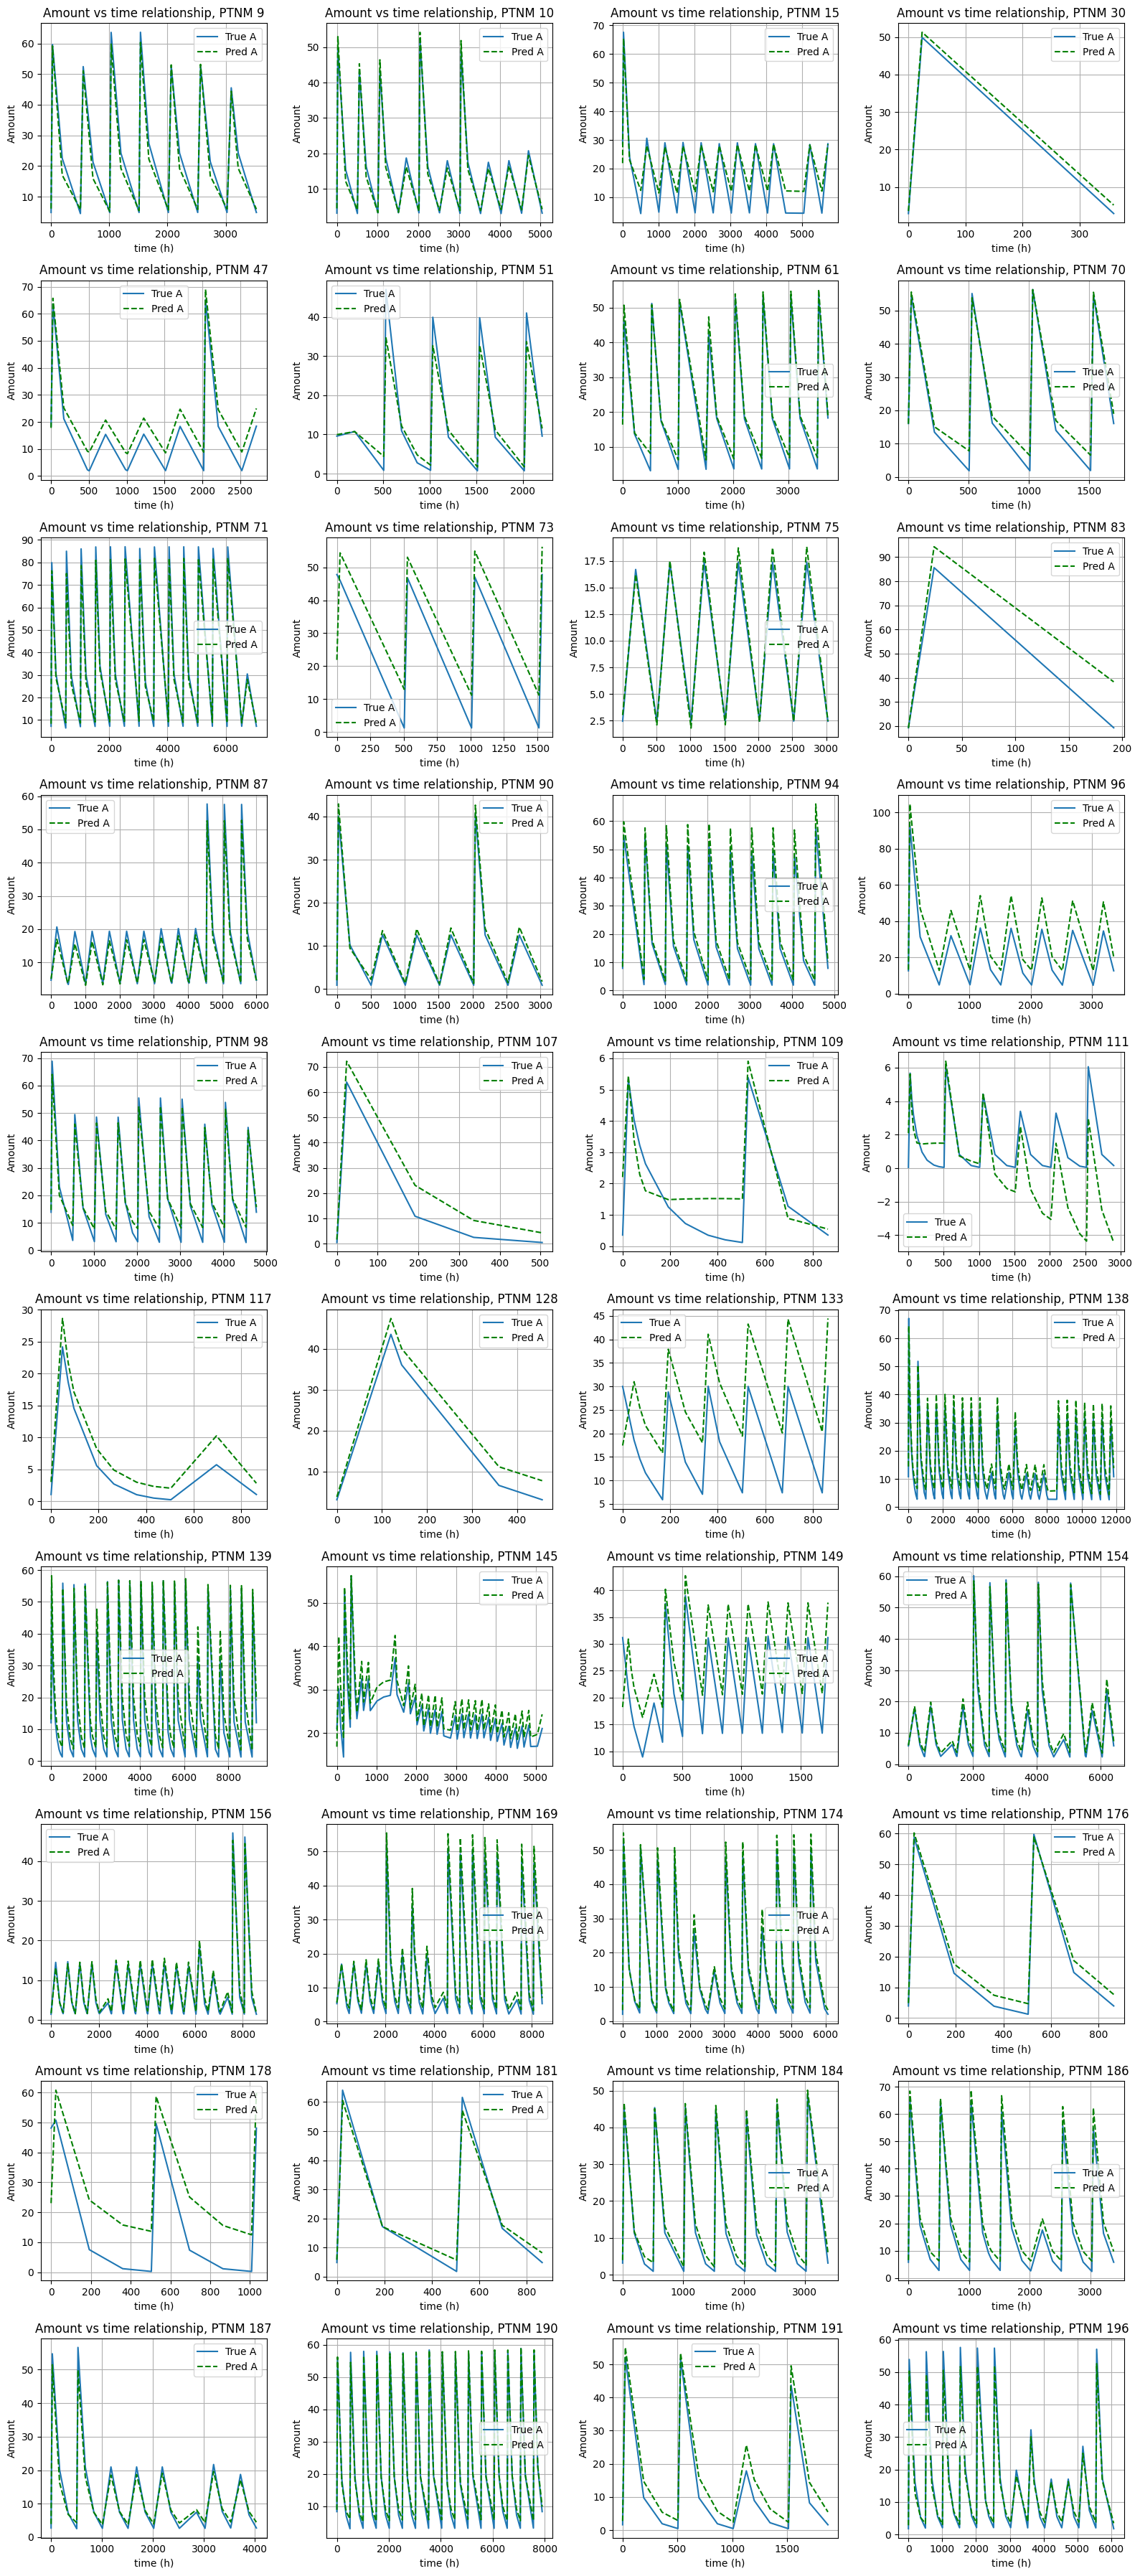

In [42]:
fig, axs = plt.subplots(10, 4, figsize=(16, 36))

for i in range(10):
    for j in range(4):
        unique_id = unique_ids[i*4+j]
        data_single = df_here[df_here['PTNM'] == unique_id]
        t = data_single['TIME']
        true_y = data_single['labels']
        pred_y = data_single['preds']
        axs[i, j].plot(t, true_y, t, pred_y, 'g--')
        axs[i, j].set_title(f'Amount vs time relationship, PTNM {unique_id}')
        axs[i, j].set_xlabel('time (h)')
        axs[i, j].set_ylabel('Amount')

        axs[i, j].grid(True)
        axs[i, j].legend(['True A', 'Pred A'])

# Adjust layout
plt.xlabel('time (h)')
plt.ylabel('Amount')
# plt.legend(['True A', 'Pred A'])
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (3.5, 3)
# unique_id = np.random.choice(unique_ids)
for unique_id in unique_ids:
    data_single = df_here[df_here['PTNM'] == unique_id]

    fig = plt.figure()
    t = data_single['TIME']
    true_y = data_single['labels']
    pred_y = data_single['preds']
    plt.plot(t, true_y)
    plt.plot(t, pred_y, 'g--')
    plt.legend(['True A', 'Pred A'])
    plt.xlabel('time (h)')
    plt.ylabel('Amount')
    plt.title(f'Amount vs time relationship, PTNM {unique_id}')
    plt.show(); plt.close()